## Project Description: 
    The dataset consists of news headlines. I have tried to implement Sentiment analysis on the news title to find out the positive and negative sentiments from the titles. Also I have performed topic modelling using LDA to find out the topics related to the titles of the news.

In [56]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import ipywidgets as widgets
%matplotlib widget
from pprint import pprint
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
import matplotlib.mlab as mlab
import matplotlib.cm as cm
from matplotlib import rcParams
import nltk
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
import gensim.corpora as corpora

%matplotlib inline
warnings.filterwarnings('ignore')
%matplotlib inline


In [57]:
data= pd.read_csv("Eluvio_DS_Challenge.csv")

### Performing Exploratory Data Analysis

In [58]:
data.shape

(509236, 8)

In [59]:
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [60]:
data.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [61]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 2] = y
    df1.iloc[:, 3] = r
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return data.sort_values('up_votes', ascending= False).head(n).style.apply(highlight_col, axis=None)
print("Change Value of N")
interact(show_latest_cases, n='10')

Change Value of N


interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.show_latest_cases(n)>

Text(0.5, 1.0, 'Realtion between Date of Creation and Upvotes')

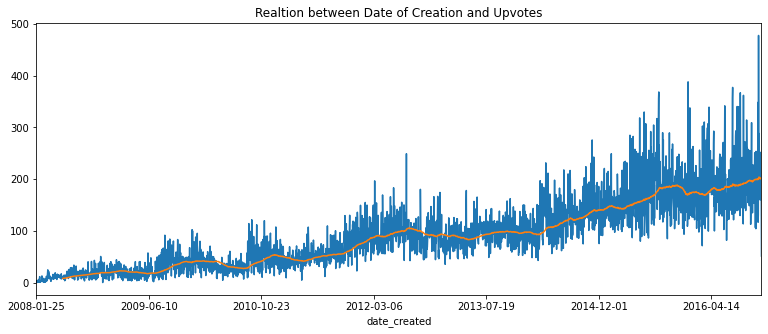

In [62]:
data.groupby('date_created')['up_votes'].mean().plot()
data.groupby('date_created')['up_votes'].mean().rolling(window=120).mean().plot(figsize= (13, 5))
plt.title("Realtion between Date of Creation and Upvotes")

Text(0.5, 1.0, 'News posting Author Wise')

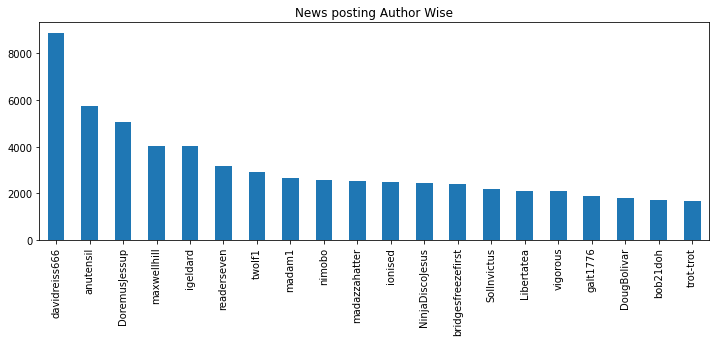

In [63]:
#who is posting
attf= data.author.value_counts()[:20]
attf.plot.bar(figsize= (12, 4))
plt.title("News posting Author Wise")

### sentiment analysis

In [64]:
#performing sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [65]:
#load VADER
analyzer = SentimentIntensityAnalyzer()
#Add VADER metrics to dataframe
data['compound'] = [analyzer.polarity_scores(v)['compound'] for v in data['title']]
data['neg'] = [analyzer.polarity_scores(v)['neg'] for v in data['title']]
data['neu'] = [analyzer.polarity_scores(v)['neu'] for v in data['title']]
data['pos'] = [analyzer.polarity_scores(v)['pos'] for v in data['title']]
data.head(3)


,time_created,date_created,up_votes,down_votes,title,over_18,author,category,compound,neg,neu,pos
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,-0.6705,0.529,0.471,0.0
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,0.0000,0.000,1.000,0.0
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,0.0000,0.000,1.000,0.0


In [66]:
data['label'] = 0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,compound,neg,neu,pos,label
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,-0.6705,0.529,0.471,0.000,-1
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,0.0000,0.000,1.000,0.000,0
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,0.0000,0.000,1.000,0.000,0
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,0.4939,0.000,0.652,0.348,1
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,-0.5267,0.362,0.638,0.000,-1


Positive headlines:



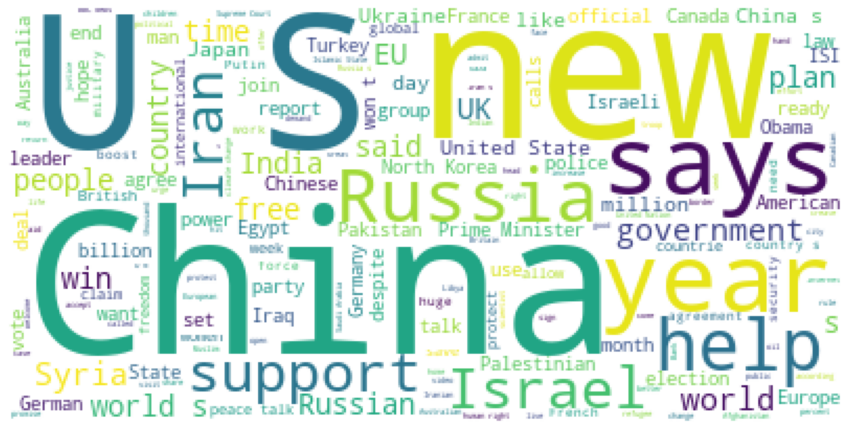

In [67]:
print("Positive headlines:\n")
stopwords = STOPWORDS
unique_string=(" ").join(list(data[data['label'] == 1].title))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()



Negative headlines:



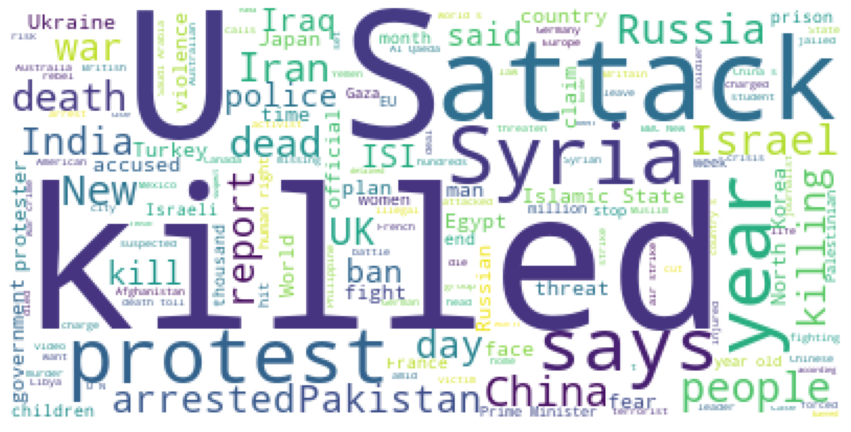

In [69]:
print("\nNegative headlines:\n")
unique_string=(" ").join(list(data[data['label'] == -1].title))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

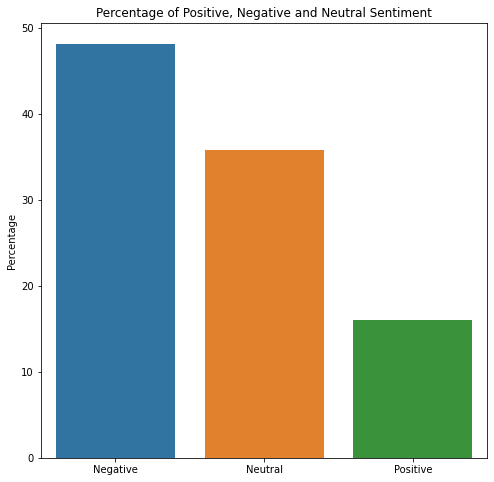

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = data.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.title("Percentage of Positive, Negative and Neutral Sentiment")
plt.show()

## Topic Modelling

In [73]:

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

dataa = data.title.values.tolist()
data_words = list(sent_to_words(dataa))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['scores', 'killed', 'pakistan', 'clashes']


In [74]:
# converting the tokenized object into a corpus and dictionary
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [75]:
#building a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"police" + 0.008*"man" + 0.008*"year" + 0.007*"old" + 0.007*"new" + '
  '0.006*"saudi" + 0.006*"women" + 0.005*"death" + 0.005*"mosul" + '
  '0.004*"arrested"'),
 (1,
  '0.019*"syria" + 0.018*"isis" + 0.017*"killed" + 0.011*"state" + '
  '0.011*"syrian" + 0.010*"islamic" + 0.010*"israel" + 0.010*"people" + '
  '0.010*"turkey" + 0.007*"attack"'),
 (2,
  '0.009*"new" + 0.008*"oil" + 0.008*"world" + 0.008*"venezuela" + '
  '0.007*"israel" + 0.007*"us" + 0.007*"says" + 0.006*"china" + 0.006*"un" + '
  '0.004*"iran"'),
 (3,
  '0.025*"korea" + 0.024*"north" + 0.016*"south" + 0.008*"nuclear" + '
  '0.008*"says" + 0.007*"korean" + 0.007*"japan" + 0.005*"china" + '
  '0.005*"suicide" + 0.004*"haram"'),
 (4,
  '0.009*"us" + 0.009*"government" + 0.009*"climate" + 0.008*"china" + '
  '0.007*"eu" + 0.007*"new" + 0.006*"change" + 0.005*"says" + 0.005*"world" + '
  '0.005*"europe"'),
 (5,
  '0.014*"president" + 0.010*"war" + 0.008*"west" + 0.008*"egypt" + '
  '0.007*"pakistan" + 0.007*"